In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/Users/sejinmoon/Desktop/Coding/BDA/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


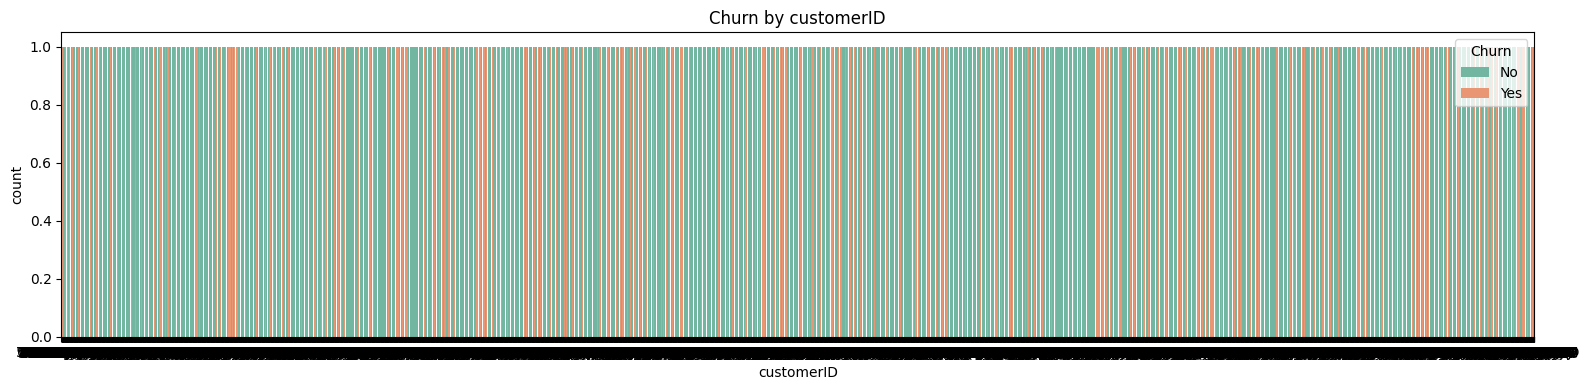

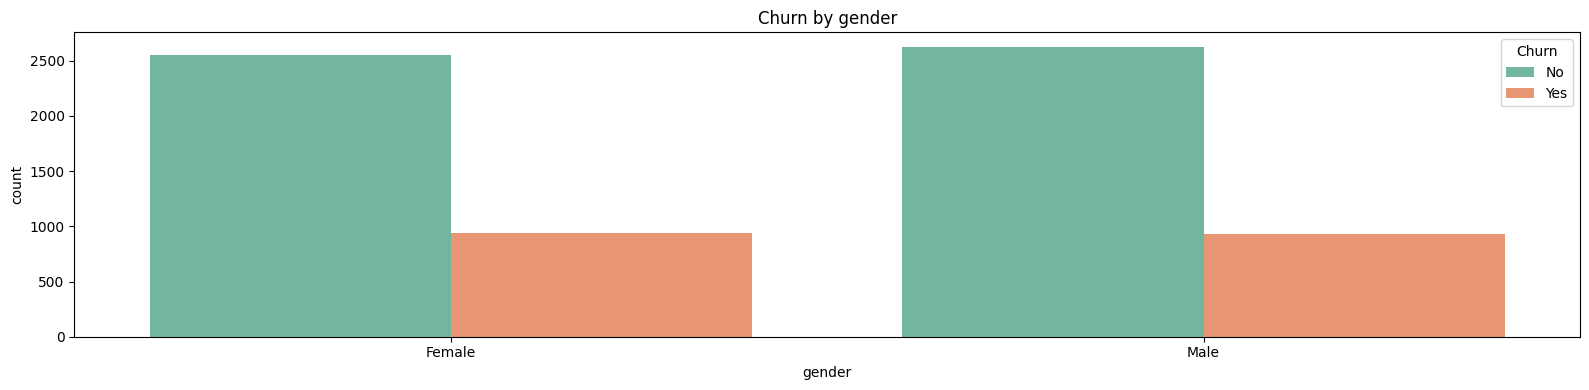

<Figure size 1600x400 with 0 Axes>

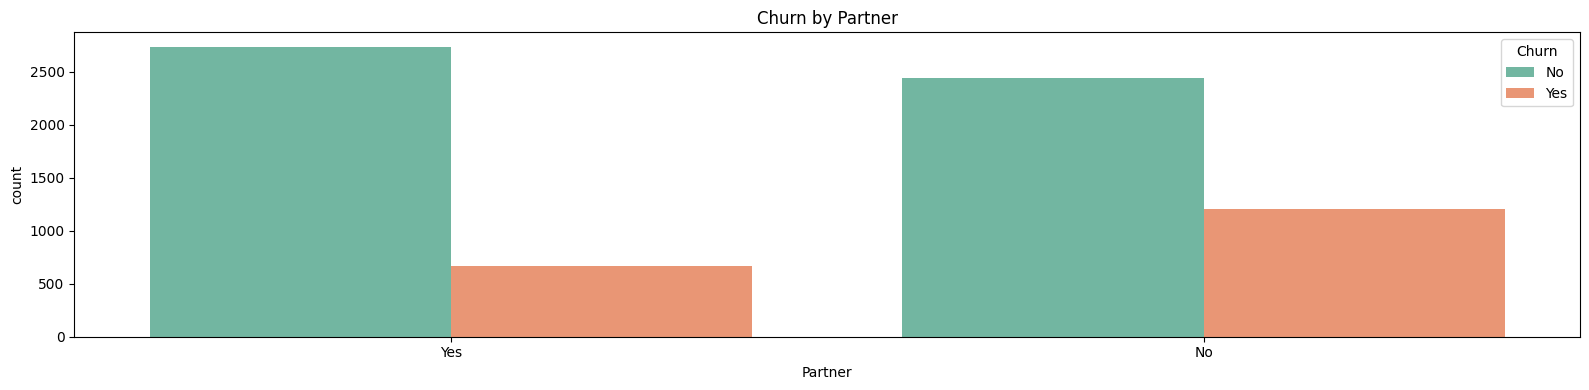

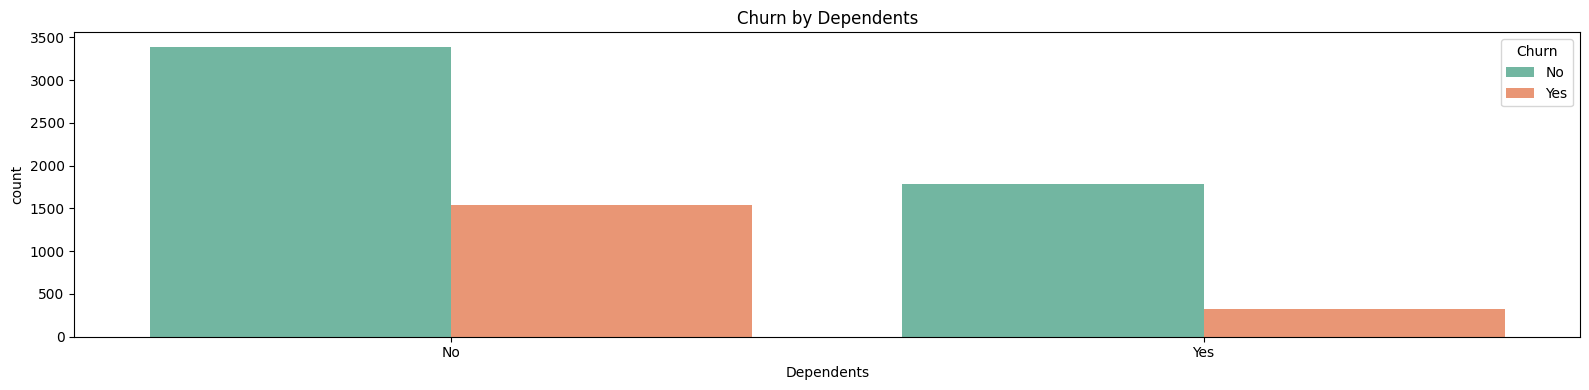

<Figure size 1600x400 with 0 Axes>

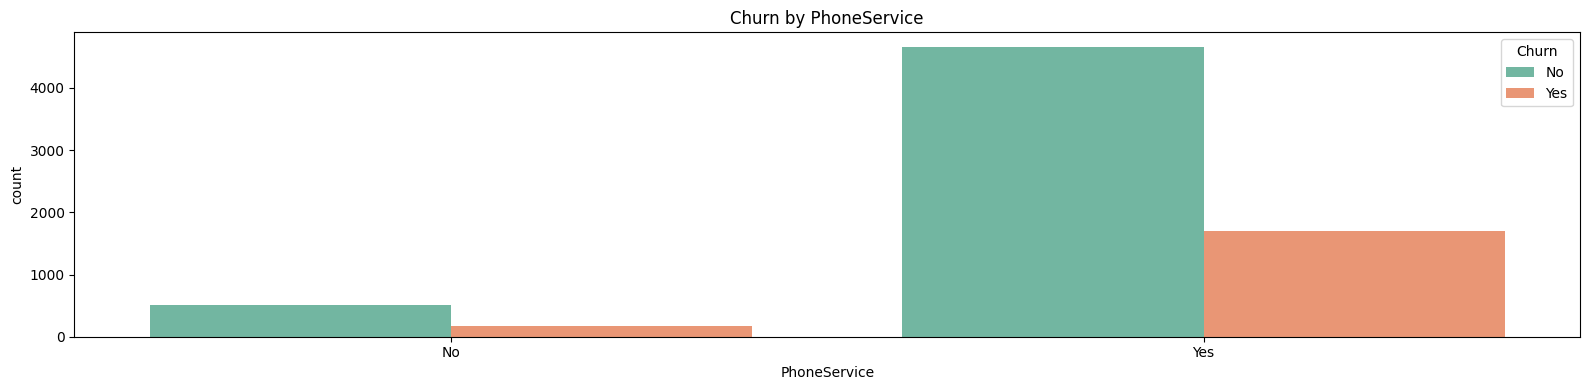

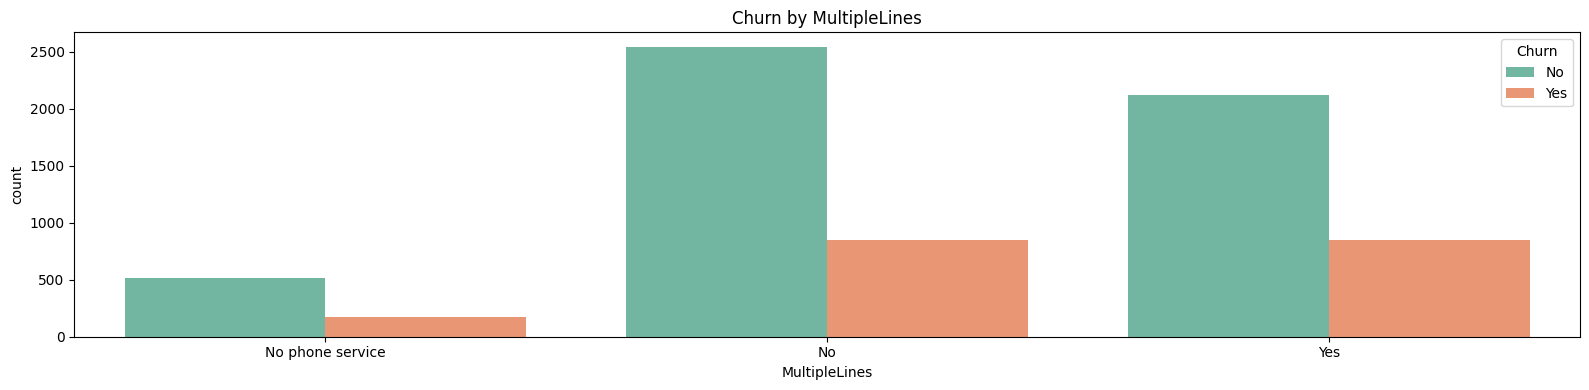

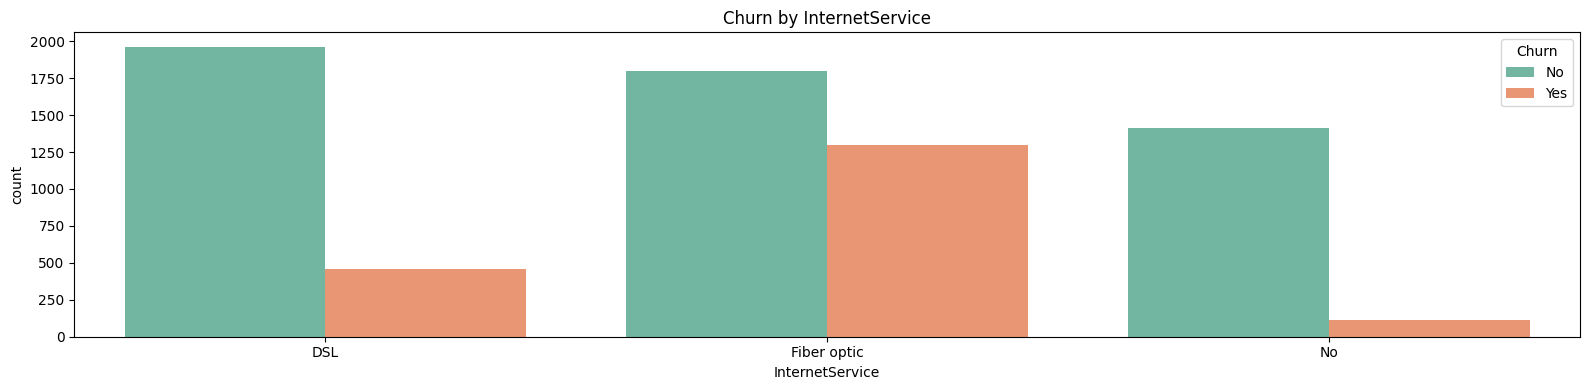

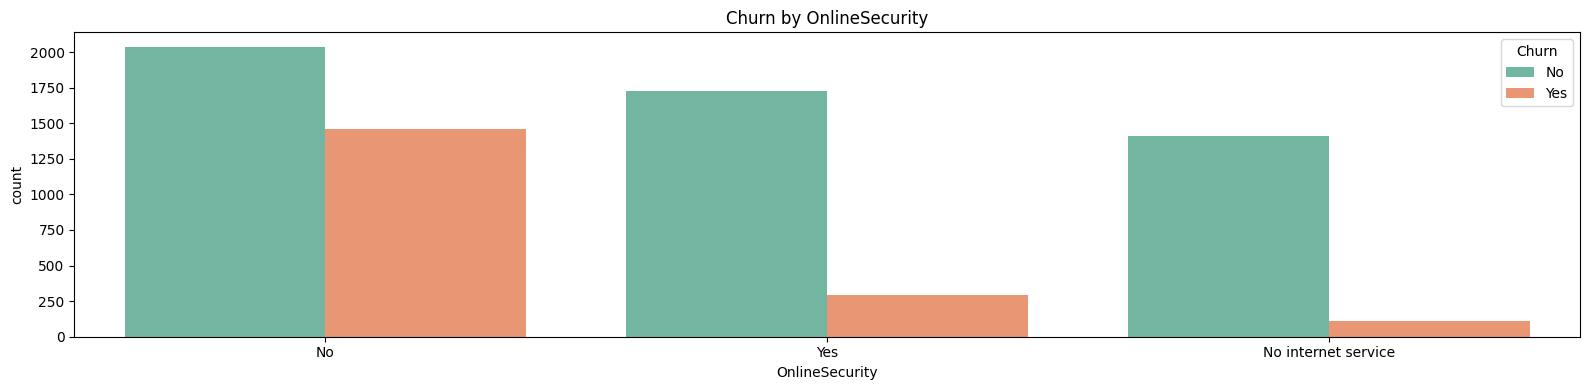

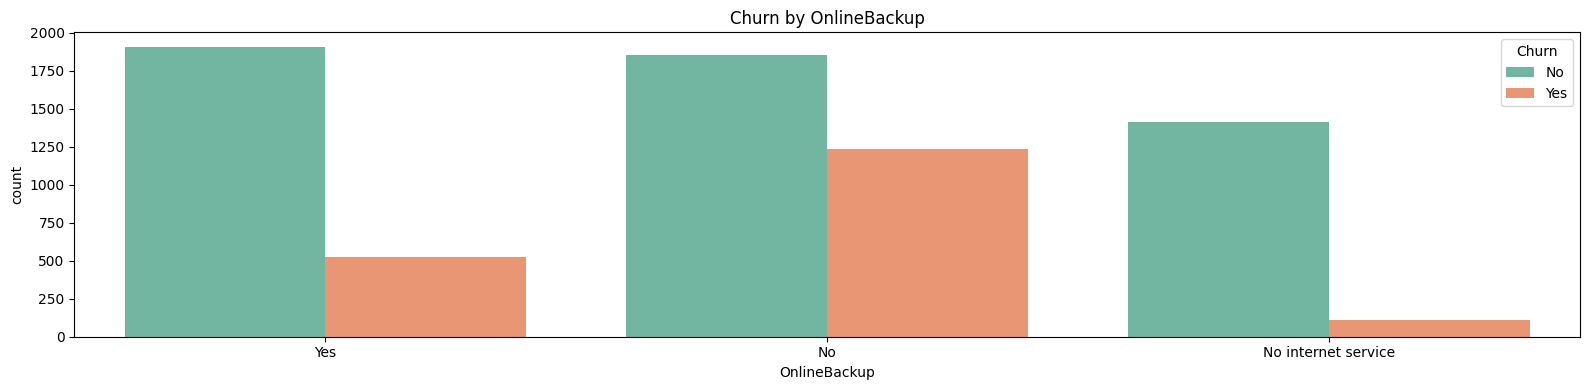

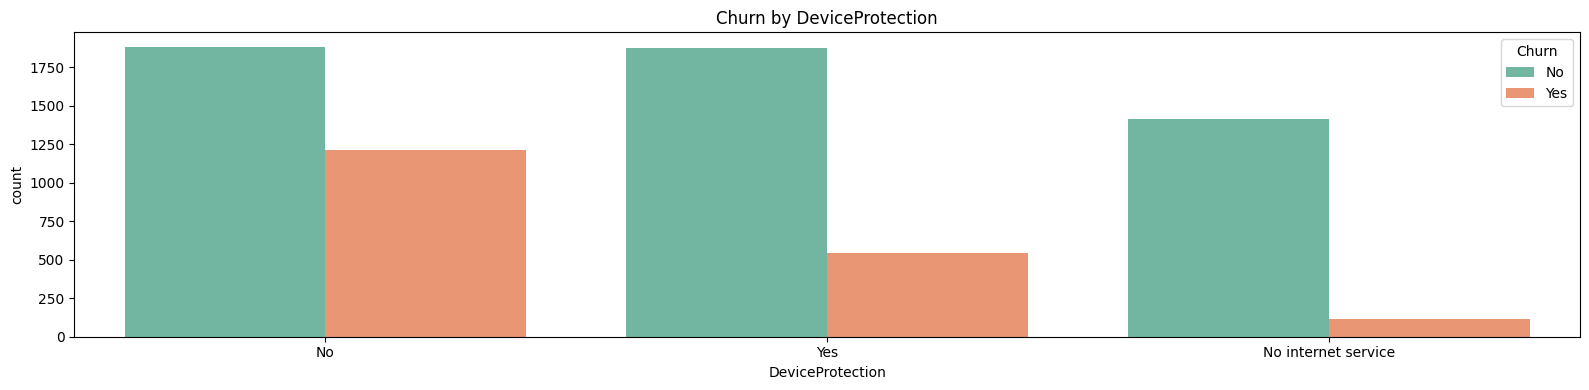

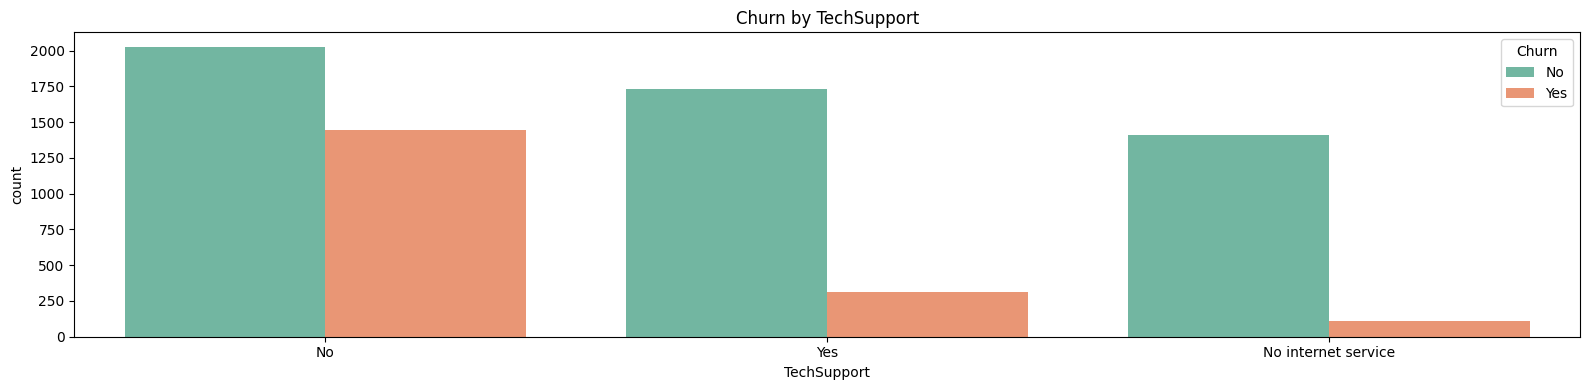

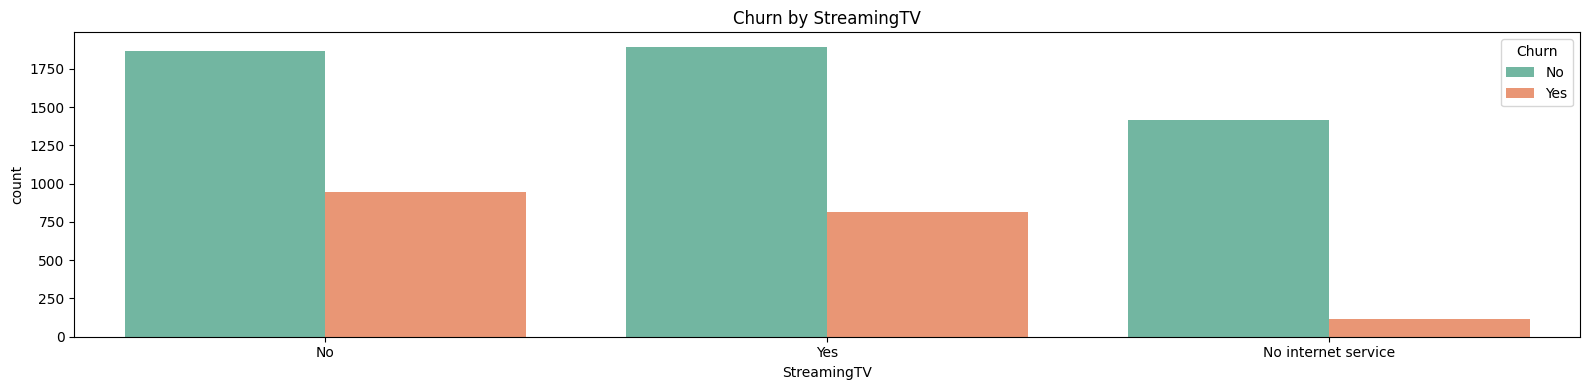

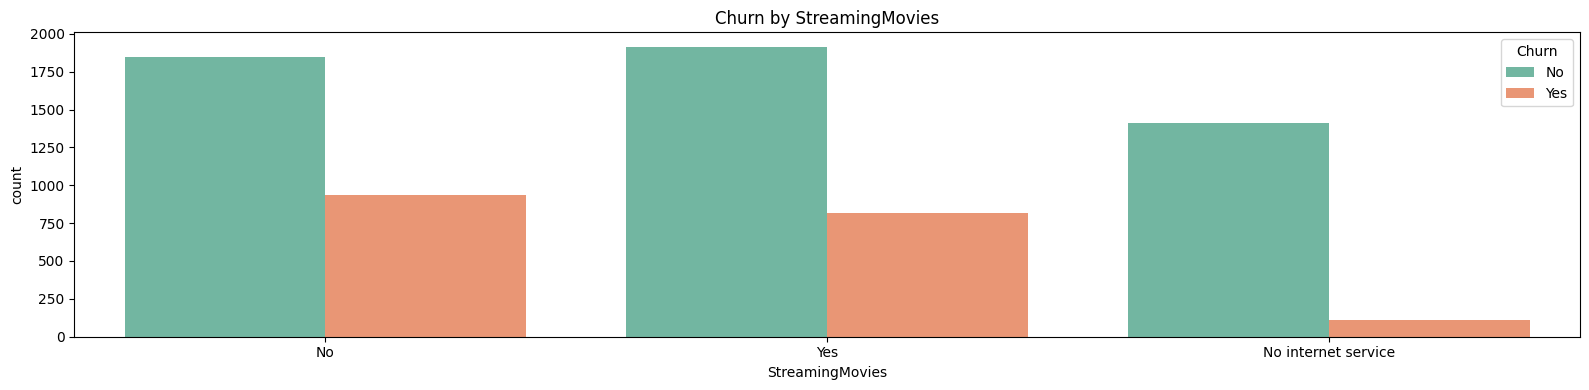

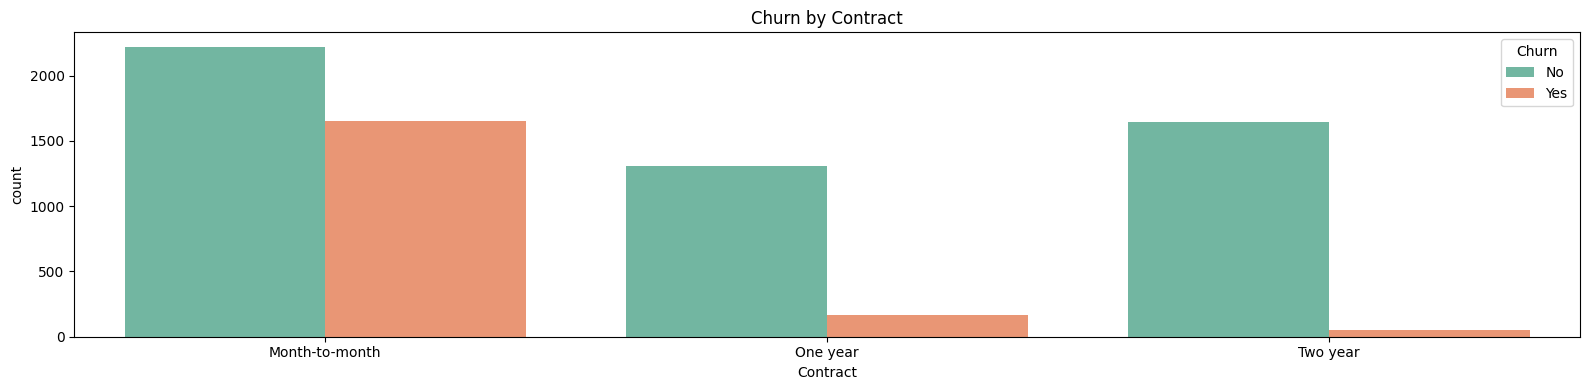

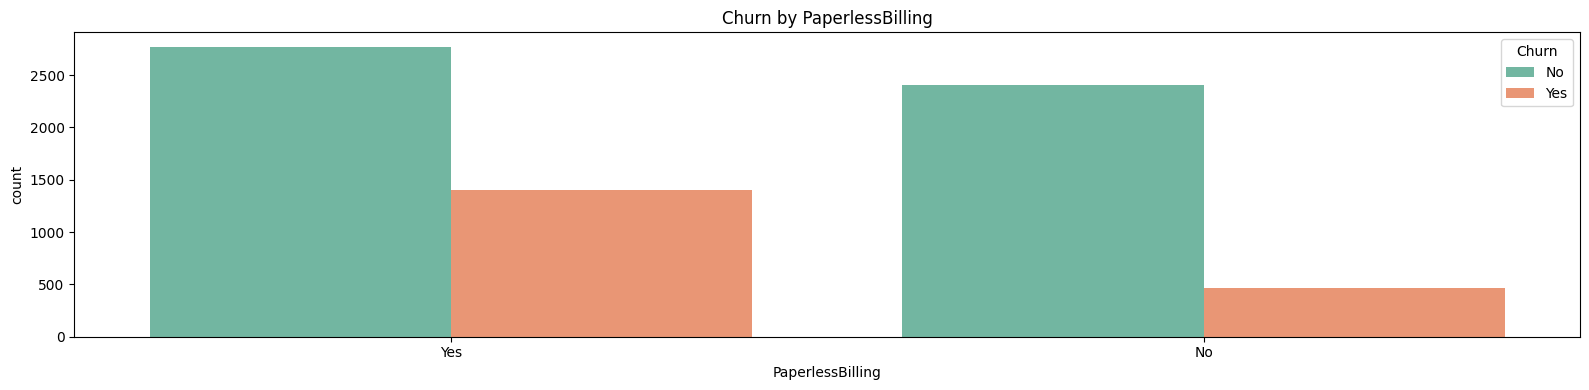

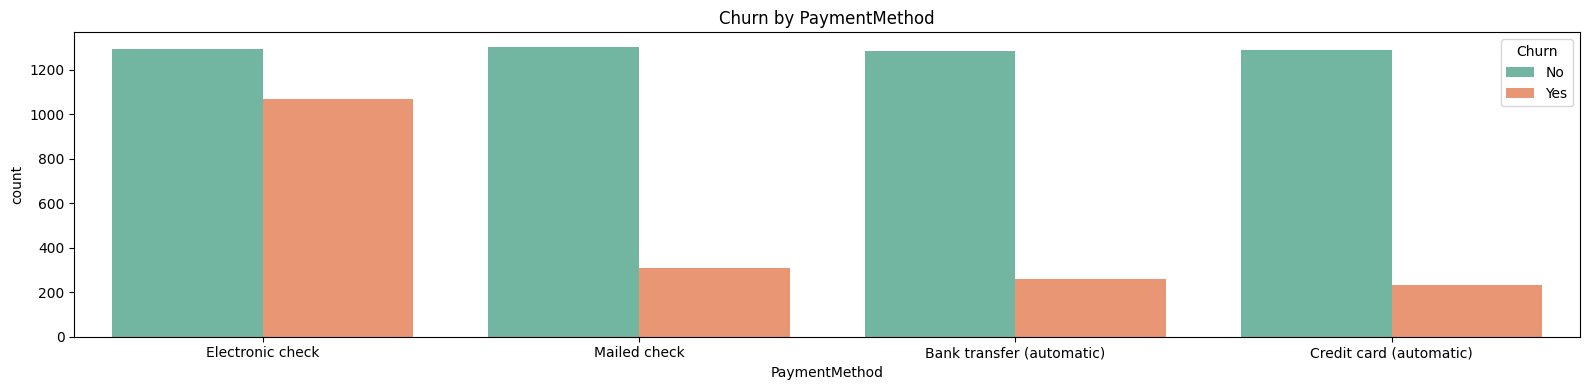

<Figure size 1600x400 with 0 Axes>

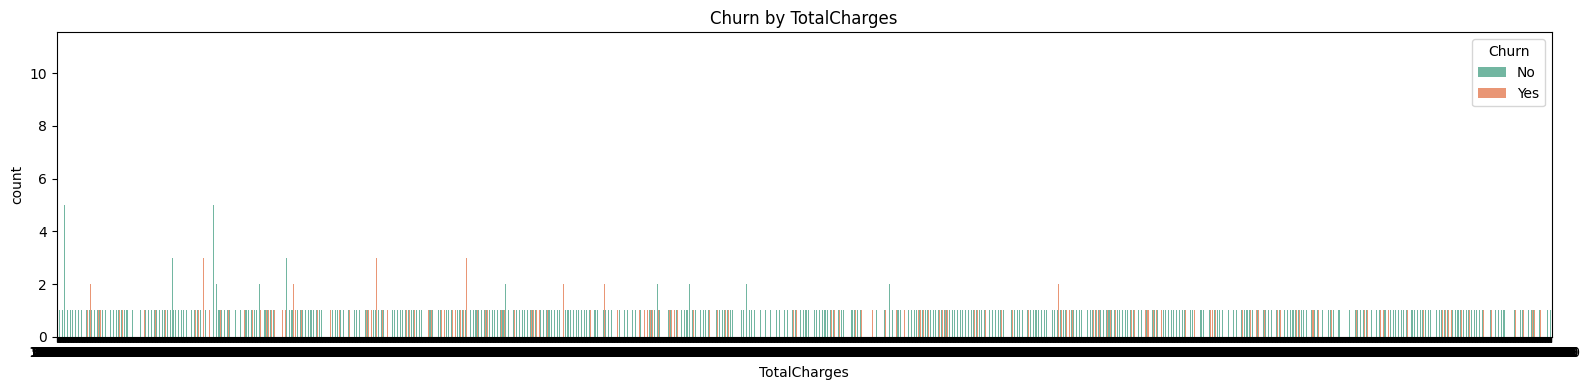

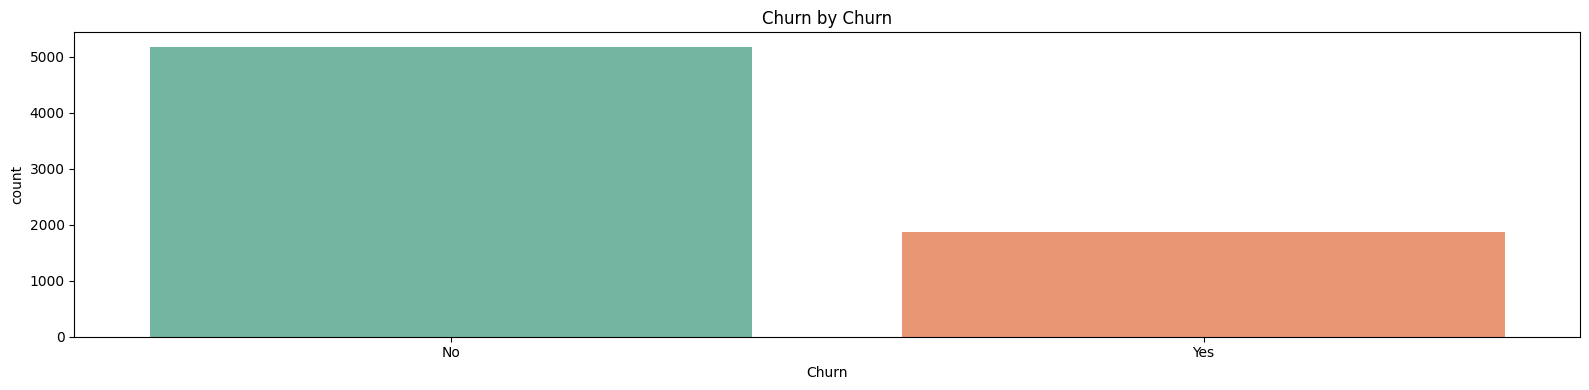

In [5]:
# Churn과 각 피처간의 관계가 필요
for column in df.columns:
    plt.figure(figsize = (16,4))
    if df[column].dtype == 'object':
        # 범주형 그래프 그리기
        sns.countplot(data = df, x = column, hue = 'Churn', palette='Set2')
        plt.title(f'Churn by {column}')

    plt.tight_layout()
    plt.show()

In [14]:
data=df.copy()

# target_feature
target_column ='Churn'

# object 타입만 추출
obj_columns=[column for column in data.columns if data[column].dtype =='object' and column != target_column]

data=data[obj_columns].drop(['customerID','TotalCharges'],axis =1)

In [15]:
# 범주형 데이터 원-핫 인코딩
data_encoded = pd.get_dummies(data, columns = data.columns, drop_first=True)

#타겟 피처 설정
features = data_encoded
target = df[['Churn']]

# 기본 베이스 모델로 학습
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 111, stratify = target)

# DT 모델 생성
dt_model = DecisionTreeClassifier(random_state=111)
dt_model.fit(X_train, y_train)

# 예측 평가
y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'DT의 정확도 : {dt_accuracy}')
print(classification_rep)

# feature_Importance 시각화
feature_importance = pd.DataFrame(
    {
        'Feature' : features.columns,
        'Importance' : dt_model.feature_importances_
    }
)
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance

DT의 정확도 : 0.7317246273953159
              precision    recall  f1-score   support

          No       0.81      0.83      0.82      1035
         Yes       0.49      0.47      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



,Feature,Importance
6,InternetService_Fiber optic,0.131903
21,Contract_Two year,0.094442
20,Contract_One year,0.081672
13,DeviceProtection_Yes,0.070260
0,gender_Male,0.067651
22,PaperlessBilling_Yes,0.062899
19,StreamingMovies_Yes,0.061171
5,MultipleLines_Yes,0.058798
11,OnlineBackup_Yes,0.051902
1,Partner_Yes,0.050532


* DT의 정확도 : 0.7317246273953159
--- 
* 해당 정확도보다 더 높은 수치를 얻기 위해서는?
* -> 피처를 줄여서 차원 축소를 하고 중요한 피처들만 남기면 좀 더 성능이 개선되지 않을까?

In [16]:
# 피처 중요도 기준으로 상위 10개 추출
n_top_features = 10
top_features = feature_importance.head(n_top_features)['Feature'].tolist()

In [17]:
# 상위 10개 피처들로 재학습
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# DT 모델 생성
dt_model = DecisionTreeClassifier(random_state=111)
dt_model.fit(X_train_selected, y_train)

# 예측 평가
y_pred_selected = dt_model.predict(X_test_selected)
dt_accuracy_selected = accuracy_score(y_test, y_pred_selected)
classification_rep_selected = classification_report(y_test, y_pred_selected)

print(f'DT의 정확도 : {dt_accuracy_selected}')
print(classification_rep_selected)

DT의 정확도 : 0.7650816181689141
              precision    recall  f1-score   support

          No       0.81      0.89      0.85      1035
         Yes       0.58      0.43      0.49       374

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



* 기존 정확도 : 0.7317246273953159
--- 
* 중요한 피처만 선정 이후
* DT의 정확도 : 0.7650816181689141

### 그럼 feature selection이 단순하게 상위 10개를 선택해서 출력한 것보다 높은 성능일까??

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Filter Method (SelectKBest with chi-squared)
filter_selector = SelectKBest(score_func= chi2, k=10)
X_train_filter = filter_selector.fit_transform(X_train, y_train)
X_test_filter = filter_selector.transform(X_test)

# Decision Tree 평가
filter_model =DecisionTreeClassifier(random_state=111)
filter_model.fit(X_train_filter, y_train)
filter_pred = filter_model.predict(X_test_filter)
filter_accuracy =accuracy_score(y_test, filter_pred)


# RFECV

rfecv_model = DecisionTreeClassifier(random_state=111)
rfecv_selector = RFECV(estimator= rfecv_model, step=1, cv=5, scoring='accuracy')
rfecv_selector.fit(X_train, y_train)
X_train_rfecv = rfecv_selector.transform(X_train)
X_test_rfecv = rfecv_selector.transform(X_test)

rfecv_model.fit(X_train_rfecv, y_train)
rfecv_pred =rfecv_model.predict(X_test_rfecv)
rfecv_accuracy =accuracy_score(y_test, rfecv_pred)

# Boruta 
rf =RandomForestClassifier(class_weight = 'balanced', max_depth=5, random_state=111)
boruta_selector = BorutaPy(rf, n_estimators='auto',random_state=111)
boruta_selector.fit(X_train.values, y_train.values)
X_train_boruta = X_train.iloc[:, boruta_selector.support_]
X_test_boruta = X_test.iloc[:, boruta_selector.support_]

boruta_model =DecisionTreeClassifier(random_state=111)
boruta_model.fit(X_train_boruta, y_train)
boruta_pred = boruta_model.predict(X_test_boruta)
boruta_accuracy =accuracy_score(y_test, boruta_pred)

/Users/sejinmoon/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sejinmoon/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sejinmoon/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/sejinmoon/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-v

In [22]:
filter_accuracy

0.7700496806245565

In [23]:
rfecv_accuracy

0.7806955287437899

In [24]:
boruta_accuracy

0.7508871540099361

### 각각의 학습기가 어떤 것을 골랐는지 확인

In [25]:
# filter가 선택한 피처
X_train.columns[filter_selector.get_support()]

Index(['InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [26]:
# rfecv가 선택한 피처   
X_train.columns[rfecv_selector.support_]

Index(['InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [27]:
# boruta가 선택한 피처
X_train.columns[boruta_selector.support_]

Index(['Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')